In [2]:
folderPath = "D:/"

# Load data helpers

In [3]:
import numpy as np
import pandas as pd

def PrintGreen(text):
    print('\x1b[6;30;42m' + text + '\x1b[0m')
    
def PrintRed(text):
    print('\33[41m' + text + '\x1b[0m')

def LoadData(filename, rowsName, columnsName):
    newDataframe = pd.read_csv(filename, na_values = 'null')
    if newDataframe.shape[0] > 0 and newDataframe.shape[1] > 0:
        PrintGreen("Loading " + filename + " succeeded");
    else:
        PrintRed("Loading " + filename + " failed!");

    print(rowsName + " = " + str(newDataframe.shape[0]))
    print(columnsName + " = " + str(newDataframe.shape[1]))

    return newDataframe

# Ensure to show all columns
pd.set_option('display.max_columns', None)

## Motion Database Poses
Evaluated skeletal poses at a given sample rate. Position and rotation in local space. Rotation is represented as the X and Y basis vectors of the transform.

In [4]:
dataPosesModelSpace = LoadData(folderPath + 'MotionMatchingDatabase_Poses_ModelSpace_60Hz.csv', "Frames", "PoseComponents")
dataPosesModelSpace.head(15)

Loading D:/MotionMatchingDatabase_Poses_ModelSpace_60Hz.csv succeeded
Frames = 73338
PoseComponents = 1647


.Pos.X  .Pos.Y  .Pos.Z  .RotBasisX.X  .RotBasisX.Y  .RotBasisX.Z  \
0      0.0     0.0     0.0           1.0           0.0           0.0   
1      0.0     0.0     0.0           1.0           0.0           0.0   
2      0.0     0.0     0.0           1.0           0.0           0.0   
3      0.0     0.0     0.0           1.0           0.0           0.0   
4      0.0     0.0     0.0           1.0           0.0           0.0   
5      0.0     0.0     0.0           1.0           0.0           0.0   
6      0.0     0.0     0.0           1.0           0.0           0.0   
7      0.0     0.0     0.0           1.0           0.0           0.0   
8      0.0     0.0     0.0           1.0           0.0           0.0   
9      0.0     0.0     0.0           1.0           0.0           0.0   
10     0.0     0.0     0.0           1.0           0.0           0.0   
11     0.0     0.0     0.0           1.0           0.0           0.0   
12     0.0     0.0     0.0           1.0           0.0           0.0   
13     0.0     0.0     0.0           1.0           0.0           0.0   
14     0.0     0.0     0.0           1.0           0.0           0.0   

    .RotBasisY.X  .RotBasisY.Y  .RotBasisY.Z  RootNode.Pos.X  RootNode.Pos.Y  \
0            0.0           1.0           0.0             0.0             0.0   
1            0.0           1.0           0.0             0.0             0.0   
2            0.0           1.0           0.0             0.0             0.0   
3            0.0           1.0           0.0             0.0             0.0   
4            0.0           1.0           0.0             0.0             0.0   
5            0.0           1.0           0.0             0.0             0.0   
6            0.0           1.0           0.0             0.0             0.0   
7            0.0           1.0           0.0             0.0             0.0   
8            0.0           1.0           0.0             0.0             0.0   
9            0.0           1.0           0.0             0.0             0.0   
10           0.0           1.0           0.0             0.0             0.0   
11           0.0           1.0           0.0             0.0             0.0   
12           0.0           1.0           0.0             0.0             0.0   
13           0.0           1.0           0.0             0.0             0.0   
14           0.0           1.0           0.0             0.0             0.0   

    RootNode.Pos.Z  RootNode.RotBasisX.X  RootNode.RotBasisX.Y  \
0              0.0                   1.0                   0.0   
1              0.0                   1.0                   0.0   
2              0.0                   1.0                   0.0   
3              0.0                   1.0                   0.0   
4              0.0                   1.0                   0.0   
5              0.0                   1.0                   0.0   
6              0.0                   1.0                   0.0   
7              0.0                   1.0                   0.0   
8              0.0                   1.0                   0.0   
9              0.0                   1.0                   0.0   
10             0.0                   1.0                   0.0   
11             0.0                   1.0                   0.0   
12             0.0                   1.0                   0.0   
13             0.0                   1.0                   0.0   
14             0.0                   1.0                   0.0   

    RootNode.RotBasisX.Z  RootNode.RotBasisY.X  RootNode.RotBasisY.Y  \
0                    0.0                   0.0                   1.0   
1                    0.0                   0.0                   1.0   
2                    0.0                   0.0                   1.0   
3                    0.0                   0.0                   1.0   
4                    0.0                   0.0                   1.0   
5                    0.0                   0.0                   1.0   
6        

In [ ]:
dataPosesLocalSpace = LoadData(folderPath + 'MotionMatchingDatabase_Poses_LocalSpace_60Hz.csv', "Frames", "PoseComponents")
dataPosesLocalSpace.head(15)

## Motion Database Features
Feature matrix

In [69]:
dataFeatures = LoadData(folderPath + 'MotionMatchingDatabase_Features_60Hz.csv', "Frames", "FeatureComponents")

if (dataPoses.shape[0] == dataFeatures.shape[0]):
    PrintGreen("Frame numbers match.")
else:
    PrintRed("Frame numbers do not match!")

dataFeatures.head(15)

Loading D:/MotionMatchingDatabase_Features_60Hz.csv succeeded
Frames = 73338
FeatureComponents = 59
Frame numbers match.


,Trajectory.Past-4.PosX,Trajectory.Past-4.PosY,Trajectory.Past-4.FacingDirX,Trajectory.Past-4.FacingDirY,Trajectory.Past-3.PosX,Trajectory.Past-3.PosY,Trajectory.Past-3.FacingDirX,Trajectory.Past-3.FacingDirY,Trajectory.Past-2.PosX,Trajectory.Past-2.PosY,Trajectory.Past-2.FacingDirX,Trajectory.Past-2.FacingDirY,Trajectory.Past-1.PosX,Trajectory.Past-1.PosY,Trajectory.Past-1.FacingDirX,Trajectory.Past-1.FacingDirY,Trajectory.Current.PosX,Trajectory.Current.PosY,Trajectory.Current.FacingDirX,Trajectory.Current.FacingDirY,Trajectory.Future1.PosX,Trajectory.Future1.PosY,Trajectory.Future1.FacingDirX,Trajectory.Future1.FacingDirY,Trajectory.Future2.PosX,Trajectory.Future2.PosY,Trajectory.Future2.FacingDirX,Trajectory.Future2.FacingDirY,Trajectory.Future3.PosX,Trajectory.Future3.PosY,Trajectory.Future3.FacingDirX,Trajectory.Future3.FacingDirY,Trajectory.Future4.PosX,Trajectory.Future4.PosY,Trajectory.Future4.FacingDirX,Trajectory.Future4.FacingDirY,Trajectory.Future5.PosX,Trajectory.Future5.PosY,Trajectory.Future5.FacingDirX,Trajectory.Future5.FacingDirY,Trajectory.Future6.PosX,Trajectory.Future6.PosY,Trajectory.Future6.FacingDirX,Trajectory.Future6.FacingDirY,L_foot_JNT.PosX,L_foot_JNT.PosY,L_foot_JNT.PosZ,R_foot_JNT.PosX,R_foot_JNT.PosY,R_foot_JNT.PosZ,L_foot_JNT.VelocityX,L_foot_JNT.VelocityY,L_foot_JNT.VelocityZ,R_foot_JNT.VelocityX,R_foot_JNT.VelocityY,R_foot_JNT.VelocityZ,C_pelvis_JNT.VelocityX,C_pelvis_JNT.VelocityY,C_pelvis_JNT.VelocityZ
0,0.520722,0.614138,0.500000,1.000000,0.526321,0.612313,0.500000,1.000000,0.530761,0.604913,0.503830,1.000000,0,0,0.50,1,0,0,0.50,1,0,0,0.50,1,0.328479,0.470761,0.938690,0.739374,0.419039,0.430342,0.938813,0.739468,0.462923,0.421422,0.948995,0.720008,0.514964,0.422570,0.932153,0.751484,0.571707,0.430904,0.975918,0.653305,0.467882,0.571410,0.035219,0.518229,0.581670,0.000018,0.215129,0.289853,0.525809,0.212383,0.248498,0.554125,0.149483,0.285851,0.517534
1,0.546598,0.612444,0.245214,0.930213,0.568748,0.609810,0.245214,0.930210,0.629113,0.599971,0.247092,0.930090,0,0,0.50,1,0,0,0.50,1,0,0,0.50,1,0.393520,0.399921,0.754613,0.929653,0.450478,0.397032,0.755712,0.929609,0.477940,0.406222,0.774647,0.917814,0.516102,0.424056,0.741189,0.937981,0.555578,0.455207,0.840815,0.865848,0.487594,0.503691,0.050791,0.528868,0.577408,0.015305,0.088027,0.241721,0.553214,0.115828,0.186001,0.591208,0.000000,0.254250,0.523277
2,0.567142,0.635298,0.061547,0.740327,0.602433,0.643570,0.061547,0.740318,0.707201,0.666623,0.062018,0.739872,0,0,0.50,1,0,0,0.50,1,0,0,0.50,1,0.494308,0.395247,0.498853,0.999999,0.498128,0.396348,0.501776,0.999997,0.498079,0.410550,0.522738,0.999483,0.511341,0.435765,0.481776,0.999668,0.518765,0.478847,0.619239,0.985574,0.507721,0.436448,0.080343,0.533931,0.573214,0.052644,0.201226,0.209553,0.543283,0.233433,0.182456,0.583145,0.188319,0.166852,0.517157
3,0.567168,0.635265,0.061419,0.740093,0.602475,0.643520,0.061419,0.740084,0.707299,0.666526,0.061889,0.739637,0,0,0.75,1,0,0,0.75,1,0,0,0.75,1,0.494336,0.395476,0.498661,0.999999,0.498324,0.397180,0.502310,0.999995,0.498783,0.412394,0.521499,0.999538,0.512508,0.438894,0.480419,0.999616,0.519835,0.483355,0.628459,0.983217,0.507997,0.436243,0.080382,0.534098,0.573111,0.052819,0.393444,0.323069,0.505811,0.363077,0.322422,0.537738,0.491418,0.321865,0.505177
4,0.567194,0.635232,0.061291,0.739858,0.602517,0.643472,0.061291,0.739849,0.707397,0.666430,0.061760,0.739403,0,0,0.50,1,0,0,0.50,1,0,0,0.50,1,0.494384,0.395744,0.498408,1.000000,0.498462,0.398169,0.503424,0.999988,0.499503,0.414337,0.519028,0.999638,0.513638,0.442292,0.480042,0.999601,0.520899,0.487865,0.637632,0.980684,0.508273,0.436039,0.080425,0.534264,0.573010,0.052996,0.524404,0.386902,0.478443,0.454697,0.400525,0.501051,0.647681,0.399962,0.499192
5,0.567221,0.635193,0.061205,0.739702,0.602561,0.643414,0.061205,0.739693,0.707499,0.666316,0.061674,0.739246,0,0,0.50,1,0,0,0.50,1,0,0,0.50,1,0.494453,0.396076,0.498153,1.000000,0.498580,0.399200,0.504772,0.999977,0.500227,0.416333,0.516556,0.99

## Recorded data (Poses, features and best matching frames)

In [70]:
recording_poses = LoadData(folderPath + 'RuntimeRecording_Poses.csv', "Frames", "PoseComponents")
recording_features = LoadData(folderPath + 'RuntimeRecording_Features.csv', "Frames", "FeatureComponents")
recording_bestMatchFrames = LoadData(folderPath + 'RuntimeRecording_BestMatchingFrames.csv', "Frames", "BestMatchingFrameComponents")

if (recording_poses.shape[0] == recording_features.shape[0] == recording_bestMatchFrames.shape[0]):
    PrintGreen("Frame numbers match.")
else:
    PrintRed("Frame numbers do not match!")

Loading D:/RuntimeRecording_Poses.csv succeeded
Frames = 1
PoseComponents = 1647
Loading D:/RuntimeRecording_Features.csv succeeded
Frames = 1
FeatureComponents = 59
Loading D:/RuntimeRecording_BestMatchingFrames.csv succeeded
Frames = 1
BestMatchingFrameComponents = 1
Frame numbers match.


## Data Preparation / Normalization

In [71]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

poseDataScaler = preprocessing.StandardScaler()
dataPosesScaled = poseDataScaler.fit_transform(dataPoses.values)

featureDataScaler = preprocessing.StandardScaler()
dataFeaturesScaled = featureDataScaler.fit_transform(dataFeatures.values)

# Input (Pose + Features)
inputPoseData = np.delete(dataPosesScaled, -1, axis=0) # remove last frame
inputFeatureData = np.delete(dataFeaturesScaled, -1, axis=0) # remove last frame
print(inputPoseData.shape)
print(inputFeatureData.shape)
data_input = np.concatenate((inputPoseData, inputFeatureData), axis=1) # concatenate horizontally
print(data_input.shape)

# Output (Next pose)
data_output = dataPosesScaled
data_output = np.delete(data_output, 0, axis=0) # remove first frame
print(data_output.shape)

(73337, 1647)
(73337, 59)
(73337, 1706)
(73337, 1647)


## ML

In [72]:
# Tensorboard
import torch
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

logdir = folderPath + "TensorBoard/" # + datetime.now().strftime("%Y%m%d") + "/"
tensorBoardWriter = SummaryWriter(logdir)

## PyTorch Model

In [73]:
import torch
import torch.nn as nn

# Set fixed random number seed
torch.manual_seed(42)

def ConstructModel(inputFeatures, outputFeatures):
    hidden_layer = 1024
    model = nn.Sequential(nn.Linear(inputFeatures, hidden_layer),
                          nn.ReLU(),
                          #nn.Dropout(0.1), # probability of an element to be zeroed. Default: 0.5
                          #nn.BatchNorm1d(layer2),
                          nn.Linear(hidden_layer, hidden_layer),
                          nn.ReLU(), #nn.LeakyReLU(),
                          #nn.Dropout(0.1),
                          #nn.BatchNorm1d(layer1),
                          nn.Linear(hidden_layer, outputFeatures),
                          #nn.Sigmoid()
                          #nn.ReLU()
                          #nn.Tanh()
                          )
    
    def init_weights(model):
        if isinstance(model, nn.Linear):
            torch.nn.init.xavier_uniform(model.weight)
            model.bias.data.fill_(0.01)

    init_weights(model)
    print(model)
    return model

## Export PyTorch model to an ONNX file

In [74]:
from torch import nn
import torch.utils.model_zoo as model_zoo
import torch.onnx

def ExportModelToOnnx(model, filename, dummy_input):
    torch.onnx.export(model,                     # model being run
                      dummy_input,               # model input (or a tuple for multiple inputs)
                      filename,                  # where to save the model (can be a file or file-like object)
                      export_params=True,        # store the trained parameter weights inside the model file
                      opset_version=10,          # the ONNX version to export the model to
                      do_constant_folding=True,  # whether to execute constant folding for optimization
                      input_names = ['input'],   # the model's input names
                      output_names = ['output'], # the model's output names
                      dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                    'output' : {0 : 'batch_size'}})

## Training

In [75]:
# Settings
learning_rate = 1e-4
weight_decay = 1e-5
epochs = 3
loss_function = nn.MSELoss()
mini_batch_size = 16
# Note: Optimizer can be changed in the code below (as it needs the model parameters it can't be done here)

Sequential(
  (0): Linear(in_features=1706, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1024, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1024, out_features=1647, bias=True)
)
Epoch 0: 
Loss after mini-batch   100: 0.091
Loss after mini-batch   200: 0.061
Loss after mini-batch   300: 0.053
Loss after mini-batch   400: 0.042
Loss after mini-batch   500: 0.035
Loss after mini-batch   600: 0.029
Loss after mini-batch   700: 0.039
Loss after mini-batch   800: 0.024
Loss after mini-batch   900: 0.027
Loss after mini-batch  1000: 0.024
Loss after mini-batch  1100: 0.026
Loss after mini-batch  1200: 0.018
Loss after mini-batch  1300: 0.025
Loss after mini-batch  1400: 0.025
Loss after mini-batch  1500: 0.020
Loss after mini-batch  1600: 0.022
Loss after mini-batch  1700: 0.023
Loss after mini-batch  1800: 0.028
Loss after mini-batch  1900: 0.025
Loss after mini-batch  2000: 0.022
Loss after mini-batch  2100: 0.023
Loss after mini-batch  2200

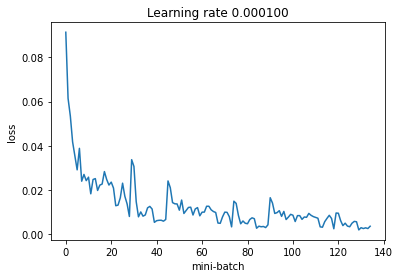

In [76]:
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

# Convert an input and output tensor into a dataset
# Inputs:
# X: torch.tensor specifying the training input data
# y: torch.tensor specifying the training labels
class CreatePytorchDataset(Dataset):
    def __getitem__(self,idx):
        return self.x_train[idx],self.y_train[idx]
    def __init__(self,X, y):
        self.x_train=X
        self.y_train=y 
    def __len__(self):
        return len(self.y_train)

def Training(model, train_loader, test_loader, optimizer):

    timeCode = datetime.now().strftime("%H:%M:%S") # used for TensorBoard

    # Re-train on the same data for the given amount of epochs
    losses = []
    for epoch in range(0, epochs):

        print("Epoch " + str(epoch) + ": ")
        running_loss = 0.0
        current_mini_batch = 0

        # Mini-batches
        for i, data in enumerate(train_loader, 0):

            # Get the inputs and labels/outputs from the dataset
            X, y = data

            #################
            # Backpropagation

            # Zero the gradients
            model.zero_grad()

            # Perform forward pass and compute prediction
            pred_y = model(X)

            # Compute loss
            loss = loss_function(pred_y, y)
            running_loss += loss.item()
            tensorBoardWriter.add_scalar(timeCode + " Loss / train", loss.item(), current_mini_batch)

            # Perform backward pass
            loss.backward()

            # Perform optimization
            optimizer.step()

            # Print statistics
            print_each = 100
            if current_mini_batch % print_each == print_each - 1:
                averaged_loss = running_loss / print_each
                print("Loss after mini-batch %5d: %.3f" % (current_mini_batch + 1, averaged_loss))
                tensorBoardWriter.add_scalar(timeCode + " Running loss / train", averaged_loss, current_mini_batch)
                losses.append(averaged_loss)
                running_loss = 0.0

            current_mini_batch = current_mini_batch + 1

    plt.plot(losses)
    plt.ylabel('loss')
    plt.xlabel('mini-batch')
    plt.title("Learning rate %f"%(learning_rate))
    plt.show()

    # TensorBoard
    tensorBoardWriter.close()


# Convert Pandas DataFrames to PyTorch tensors
X = torch.tensor(data_input, dtype=torch.float32)
y = torch.tensor(data_output, dtype=torch.float32)

# Construct the PyTorch dataset and data loaders
torchDataset = CreatePytorchDataset(X, y)
train_loader = torch.utils.data.DataLoader(torchDataset, batch_size=mini_batch_size)
test_loader = torch.utils.data.DataLoader(torchDataset, batch_size=mini_batch_size)

# Construct the model and optimizer and train the model
inputFeatures = X.shape[1]
outputFeatures = y.shape[1]
model = ConstructModel(inputFeatures, outputFeatures)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
Training(model, train_loader, test_loader, optimizer)

# Export the trained model to an ONNX file
filename = folderPath + 'OnnxModel.onnx'
ExportModelToOnnx(model, filename, X)

In [77]:
import onnx

onnx_model = onnx.load("D:/OnnxModel.onnx")
onnx.checker.check_model(onnx_model)

In [78]:
import onnxruntime

ort_session = onnxruntime.InferenceSession("D:/OnnxModel.onnx")

# compute ONNX Runtime output prediction
# ort_input = {"input": [X[0].numpy()]}
ort_input = {"input": X.numpy()}
ort_outs = ort_session.run(None, ort_input)

In [104]:
ort_outs[0][25][25]

0.6490009

In [106]:
torch_outs = model(X)

In [107]:
len(torch_outs)

1647

In [108]:
ort_outs[0][25][25]

tensor(0.6490, grad_fn=<SelectBackward0>)

In [88]:
dataPosesOriginal = poseDataScaler.inverse_transform(ort_outs[0])

In [119]:
referencePoses = dataPoses.to_numpy()
referencePoses

array([[ 0.e+00,  0.e+00,  0.e+00, ...,  1.e-08,  1.e+00, -0.e+00],
       [ 0.e+00,  0.e+00,  0.e+00, ...,  1.e-08,  1.e+00, -0.e+00],
       [ 0.e+00,  0.e+00,  0.e+00, ...,  1.e-08,  1.e+00, -0.e+00],
       ...,
       [ 0.e+00,  0.e+00,  0.e+00, ...,  1.e-08,  1.e+00, -0.e+00],
       [ 0.e+00,  0.e+00,  0.e+00, ...,  1.e-08,  1.e+00, -0.e+00],
       [ 0.e+00,  0.e+00,  0.e+00, ...,  1.e-08,  1.e+00, -0.e+00]])

Avg L1: 45.31553661059448


<function matplotlib.pyplot.show(close=None, block=None)>

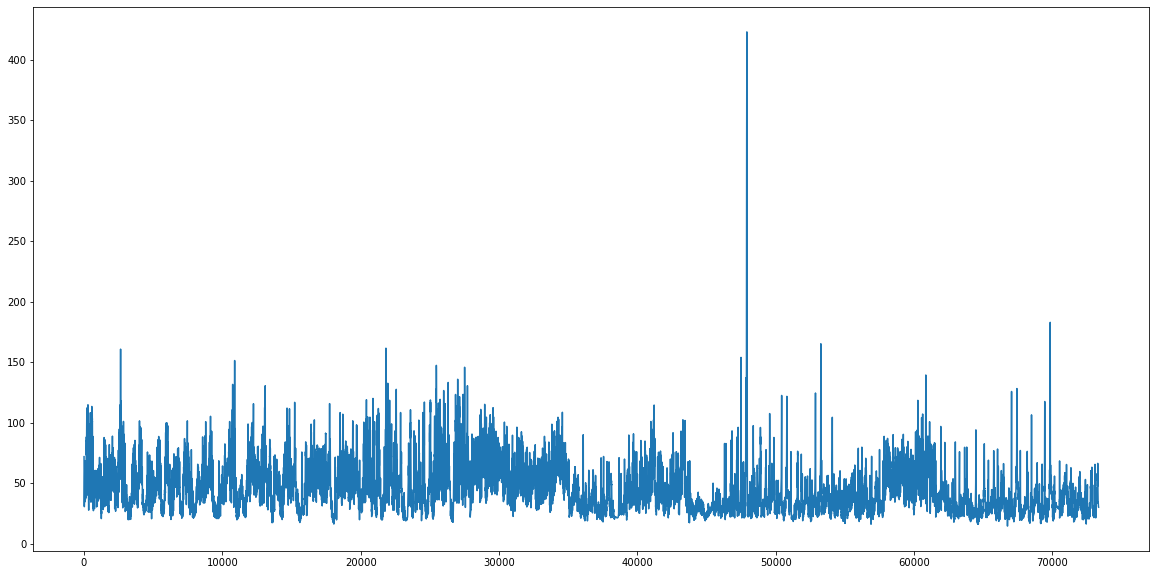

In [132]:
l1 = np.empty(len(dataPosesOriginal))
for i in range(len(dataPosesOriginal)):
    l1[i] = np.linalg.norm((dataPosesOriginal[i] - referencePoses[i + 1]), ord=1)
print("Avg L1: " + str(np.average(l1)))
plt.figure(figsize=(20,10))
plt.plot(l1)
plt.show

Avg L2: 1.765837665407091


<function matplotlib.pyplot.show(close=None, block=None)>

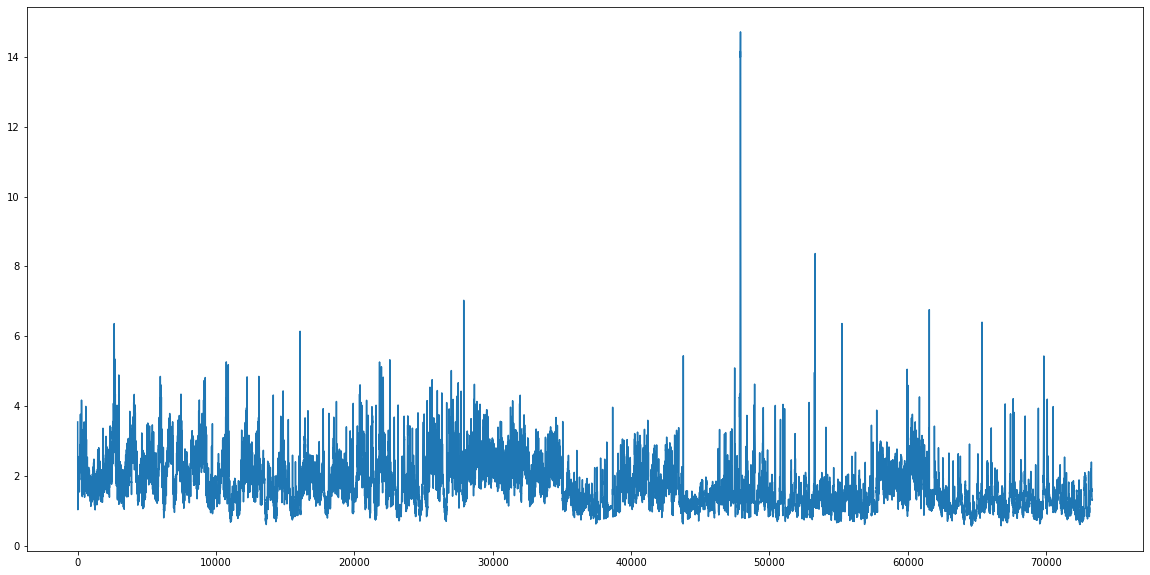

In [133]:
l2 = np.empty(len(dataPosesOriginal))
for i in range(len(dataPosesOriginal)):
    l2[i] = np.linalg.norm((dataPosesOriginal[i] - referencePoses[i + 1]))
print("Avg L2: " + str(np.average(l2)))
plt.figure(figsize=(20,10))
plt.plot(l2)
plt.show

In [113]:
len(dataPosesOriginal)

73337

In [89]:
len(dataPosesOriginal)

73337

In [99]:
finalPoses = pd.DataFrame(dataPosesOriginal, columns=dataPoses.columns.values)
finalPoses

.Pos.X    .Pos.Y    .Pos.Z  .RotBasisX.X  .RotBasisX.Y  .RotBasisX.Z  \
0      0.073247  0.033802 -0.055784      1.081640     -0.087432      0.017069   
1      0.083471  0.017398 -0.052101      1.042114     -0.062739     -0.011438   
2      0.078906  0.036815 -0.038493      1.036252     -0.066116     -0.037299   
3      0.072162  0.031326 -0.032000      1.036648     -0.061523     -0.036364   
4      0.068958  0.029256 -0.027741      1.037615     -0.059655     -0.036025   
...         ...       ...       ...           ...           ...           ...   
73332  0.075813  0.041871  0.020188      0.986632      0.006173      0.024806   
73333  0.075483  0.042314  0.020728      0.986262      0.006587      0.024929   
73334  0.075145  0.042786  0.021214      0.985888      0.006964      0.025138   
73335  0.075150  0.042859  0.021229      0.985912      0.007002      0.025143   
73336  0.075158  0.042909  0.021240      0.985925      0.007017      0.025152   

       .RotBasisY.X  .RotBasisY.Y  .RotBasisY.Z  RootNode.Pos.X  \
0          0.065603      1.090041     -0.018845        0.061565   
1          0.041846      1.044908     -0.001539        0.027176   
2          0.005776      1.025875     -0.002745        0.022028   
3          0.004003      1.021252      0.000092        0.026465   
4          0.003046      1.019514      0.000840        0.027790   
...             ...           ...           ...             ...   
73332      0.022426      1.015127      0.012914       -0.030652   
73333      0.022430      1.015227      0.013020       -0.030509   
73334      0.022508      1.015364      0.013125       -0.030300   
73335      0.022520      1.015363      0.013131       -0.030262   
73336      0.022529      1.015361      0.013138       -0.030229   

       RootNode.Pos.Y  RootNode.Pos.Z  RootNode.RotBasisX.X  \
0           -0.031076       -0.080423              0.957274   
1           -0.010838       -0.040344              0.972100   
2           -0.002224       -0.032050              0.996030   
3            0.002088       -0.033889              1.000677   
4            0.005081       -0.030834              1.001193   
...               ...             ...                   ...   
73332        0.005937       -0.001969              1.018998   
73333        0.006199       -0.002381              1.018808   
73334        0.006455       -0.002794              1.018602   
73335        0.006454       -0.002793              1.018628   
73336        0.006453       -0.002801              1.018642   

       RootNode.RotBasisX.Y  RootNode.RotBasisX.Z  RootNode.RotBasisY.X  \
0                 -0.022158             -0.051094              0.061906   
1                 -0.011731             -0.030251              0.052779   
2                 -0.000886              0.006007              0.070219   
3                 -0.004731              0.009457              0.064413   
4                 -0.006537              0.008936              0.061991   
...                     ...                   ...                   ...   
73332              0.008862              0.009312              0.005724   
73333              0.008402              0.009414              0.005917   
73334              0.007882              0.009420              0.006131   
73335              0.007841              0.009409              0.006121   
73336              0.007820              0.009404              0.006116   

       RootNode.RotBasisY.Y  RootNode.RotBasisY.Z  root.Pos.X  root.Pos.Y  \
0                  1.087288              0.038474   -2.296541    1.577562   
1                  1.053023              0.016171   -1.521935    0.976658   
2                  1.034307              0.003782   -0.596009    0.461355   
3                  1.030846             -0.001019   -0.455668    0.441070   
4                  1.028713             -0.002857   -0.448138    0.371480   
...                     ...                   ...         ...         ...   
73332              1.053790       

In [109]:
finalPoses.to_csv("D:/InferencedPoses.csv", index=False)

Test 1:

result_data

iterate through data_input
    resulting_scaled_pose = model.predict(data_input[i])
    resulting_pose = poseDataScaler.inverse_transform(resulting_scaled_pose)
    result_data.add_row(resulting_pose)

store_to_csv(result_data)




Result: csv file hopefully containing a similar result as the original animation

* New AnimGraphNode that can read a csv file and play it back (by applying the next pose with each Update())















TODO:
* Infer the model on all input frames, store the results inside a new .CSV file
* Create a way to play back the "animation" of the exported CSV file
* (If that looks a bit OK), use ONNX in motion matching code to step forward
* motion borders are an issue. inside the motion database we have several individual motions, but we don't separate them yet here